# Functions and classes in Python

Author: Jeff Jennings (CCA, jjennings@simonsfoundation.org)

## Functions

### Some common function syntax

### `*args` and `**kwargs` function arguments

When it's not known what arguments a function will receive, you can include `*args` (after all other arguments) to add an arbitrary number of positional arguments into a tuple,
`args`:

In [173]:
def func(x, y, *args):
  print(args)

func(1, 2, 3, 4, 'my_arg')

(3, 4, 'my_arg')


Similarly you can pass arbitrary keyword arguments into a
function with `**kwargs`. All keyword arguments not specified in the function
definition are packed into the dictionary `kwargs`:

In [174]:
def func(x, y, **kwargs):
  print(kwargs)

func(1, 2, a=3, b=4)

{'a': 3, 'b': 4}


You can combine these, e.g. when calling a function that takes a lot of arguments:

In [175]:
def func(a, b, c, x, y, z):
  print(a, b, c)
  print(x, y, z)

args = [1, 2, 3]
kwargs = {'x': 4, 'y': 5, 'z': 6}
func(*args, **kwargs)

1 2 3
4 5 6


### `lambda` functions

A lambda function is a type of anonymous function. The executable
body of a lambda function must be an 'expression' (as opposed to a 'statement') -- it can't contain, e.g.,
loop blocks, conditionals or print statements. As a simple example:

In [176]:
f = lambda x: x ** 2 + 2 * x + 5
f(2)

13

The argument of `2` of `f(2)` was passed to `x`. You can have a lambda function with more than one argument:

In [177]:
f = lambda x, y: x ** 2 + 2 * x * y + 5
f(2, 3)

21

### List comprehensions

A list comprehension is a construct to create a list based on another iterable
object in one line:

In [178]:
xs = range(10)
squares = [x ** 2 for x in xs]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


This is faster and 'neater' than using a `for` loop:

In [179]:
squares = []
for x in xs:
  squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


As a more complex example, a list comprehension can use an `if` statement:

In [180]:
squares = [x ** 2 for x in xs if x % 2 == 0]
squares

[0, 4, 16, 36, 64]

And it can do more complex mapping:

In [181]:
squares = [x ** 2 if x % 2 == 0 else x for x in xs]
squares

[0, 1, 4, 3, 16, 5, 36, 7, 64, 9]

List comprehensions can even be nested. For example, to flatten a list of lists:

In [182]:
nested_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print([element for sub_list in nested_list for element in sub_list])
# you can understand this by reading it as
# 'for sub_list in nested_list: for element in sub_list: element'

# written more succinctly, but less intuitively at first:
[e for l in nested_list for e in l]

[1, 2, 3, 4, 5, 6, 7, 8, 9]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

Sometimes list comprehensions can be confusing to read, and you end up understanding them by thinking through the equivalent `for` loop -- use a `for` loop if it's easier for you.

### Exercise: turning some plotting code into a function

We'll start by getting the needed packages and files.

In [183]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mco
from astropy.visualization.mpl_normalize import simple_norm
from astropy.utils.data import download_file

In [ ]:
# get the sky image used for the tutorial
as209_img = np.load('../_static/AS209_dirty_image.npy')

Cloning into 'short_tutorials'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 69 (delta 10), reused 51 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 4.86 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Convert the below code into a function:

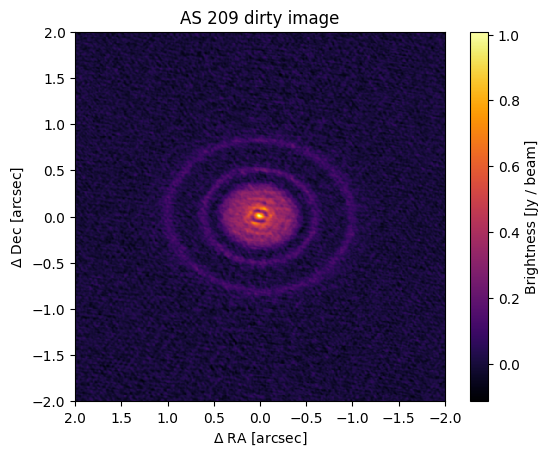

In [185]:
fig, ax = plt.subplots()

im = ax.imshow(
    as209_img,
    origin='lower',
    interpolation='none',
    extent=[2, -2, -2, 2],
    cmap='inferno',
    norm=None,
    )

ax.set_xlabel(r'$\Delta$ RA [arcsec]')
ax.set_ylabel(r'$\Delta$ Dec [arcsec]')
ax.set_title('AS 209 dirty image')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Brightness [Jy / beam]')

#### Solution

In [186]:
def plot_image(
    image,
    extent,
    cmap="inferno", # several arguments can use sensible defaults
    norm=None,
    origin="lower",
    interpolation=None,
    ax=None, # if not passed in, an axis is generated by the function
    title=None,
    xlab=r"$\Delta$ RA [arcsec]",
    ylab=r"$\Delta$ Dec [arcsec]",
    clab=r"I [Jy / beam]",
):
    r"""
    Wrapper for plt.imshow, with a colorbar.

    Parameters
    ----------
    image : array
        2D image array.
    extent : list, len=4
        x- and y-extents of image: [x-min, x-max, y-min, y-max]
    cmap : str, default="inferno
        Matplotlib colormap.
    ...

    Returns
    -------
    im : Matplotlib imshow instance
        The plotted image.
    cbar : Matplotlib colorbar instance
        Colorbar for the image.
    """
    if ax is None:
        _, ax = plt.subplots()

    im = ax.imshow(
        image,
        origin=origin,
        interpolation=interpolation,
        extent=extent,
        cmap=cmap,
        norm=norm,
    )

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)

    cbar = plt.colorbar(im, ax=ax, location="right", pad=0.1)
    cbar.set_label(clab)

    return im, cbar

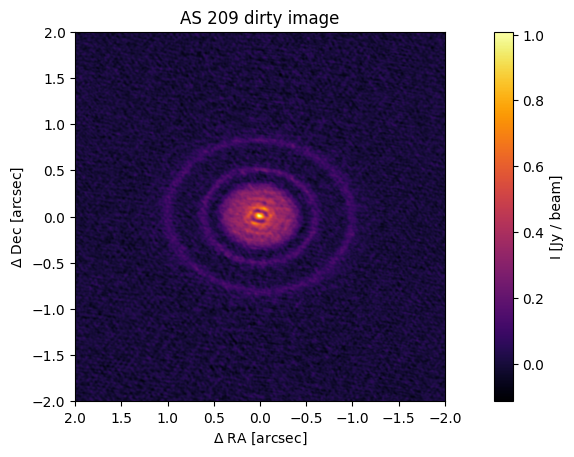

In [187]:
im, cbar = plot_image(
    as209_img,
    extent=[2, -2, -2, 2],
    title="AS 209 dirty image",
    )

Compare the above few lines to the code we had when we didn't use a function. The latter would need to be copy/pasted and slightly modified each time we want to make a plot, making the whole notebook much longer and harder to read. And if we change the block of code in one place in a notebook, we probably want to keyword search/replace everywhere...barf.

```
fig, ax = plt.subplots()

im = ax.imshow(
     as209_img,
     origin='lower',
     interpolation='none',
     extent=[2, -2, -2, 2],
     cmap='inferno',
     norm=None,
     )

ax.set_xlabel(r'$\Delta$ RA [arcsec]')
ax.set_ylabel(r'$\Delta$ Dec [arcsec]')
ax.set_title('AS 209')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Brightness [Jy / beam]')
```

Going back to our function, if we want to change several of the default arguments, we could pass all of them in individually...

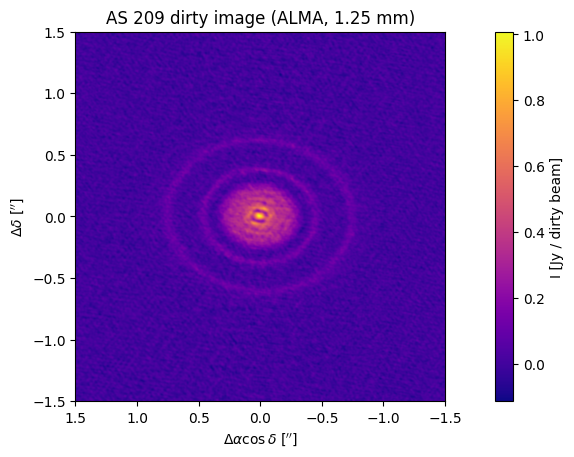

In [188]:
# changing the values of several arguments:
im, cbar = plot_image(
    as209_img,
    extent=[1.5, -1.5, -1.5, 1.5],
    cmap="plasma",
    title="AS 209 dirty image (ALMA, 1.25 mm)",
    xlab=r"$\Delta \alpha \cos \delta$ [${}^{\prime\prime}$]",
    ylab=r"$\Delta \delta$ [${}^{\prime\prime}$]",
    clab=r"I [Jy / dirty beam]",
    )

...but we could also use what we learned about `kwargs` to simplify either the function call or the function itself.

Let's first simplify the function call without changing the function; to do this, just make a dictionary of keyword arguments:

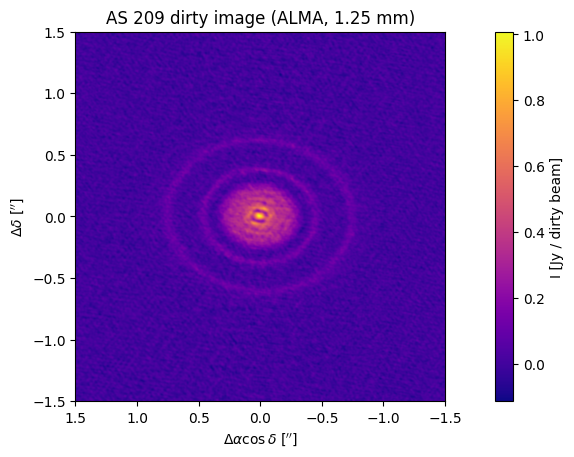

In [189]:
# dictionary of keyword arguments, which could be saved for reference/re-use,
# or passed to something enclosing or calling our function, like a class
kw = {
    "cmap": "plasma",
    "norm": None,
    "origin": "lower",
    "interpolation": None,
    "ax": None,
    "title": "AS 209 dirty image (ALMA, 1.25 mm)",
    "xlab": r"$\Delta \alpha \cos \delta$ [${}^{\prime\prime}$]",
    "ylab": r"$\Delta \delta$ [${}^{\prime\prime}$]",
    "clab": r"I [Jy / dirty beam]",
    }

im, cbar = plot_image(
    as209_img,
    extent=[1.5, -1.5, -1.5, 1.5],
    **kw
    )

Alternatively to simplify the function itself, we can allow an arbitrary number of keyword arguments to be passed in, and group these arguments by how they'll be used:

In [190]:
def plot_image_simple(
    image,
    extent,
    ax,
    plot_kwargs,
    ax_kwargs,
    # the 2 kwargs arguments replaced all of:
    # cmap="inferno",
    # norm=None,
    # origin="lower",
    # interpolation=None,
    # ax=None,
    # title=None,
    # xlab=r"$\Delta$ RA [arcsec]",
    # ylab=r"$\Delta$ Dec [arcsec]",
    # clab=r"I [Jy / beam]",
):
    r"""
    Wrapper for plt.imshow, with a colorbar.

    Parameters
    ----------
    image : array
        2D image array.
    extent : list, len=4
        x- and y-extents of image: [x-min, x-max, y-min, y-max]
    ax : plt.axes instance
        Axis on which to plot
    plot_kwargs : dictionary
        Arguments passed to plt.imshow
    ax_kwargs : dictionary
        Arguments used to set axes labels

    Returns
    -------
    im : Matplotlib imshow instance
        The plotted image.
    cbar : Matplotlib colorbar instance
        Colorbar for the image.
    """
    if ax is None:
        _, ax = plt.subplots()

    im = ax.imshow(
        image,
        **plot_kwargs # using specifically the `plot_kwargs`
    )

    # using `ax_kwargs`
    ax.set_xlabel(ax_kwargs['xlab'])
    ax.set_ylabel(ax_kwargs['ylab'])
    ax.set_title(ax_kwargs['title'])

    cbar = plt.colorbar(im, ax=ax, location="right", pad=0.1)
    cbar.set_label(ax_kwargs['clab'])

    return im, cbar

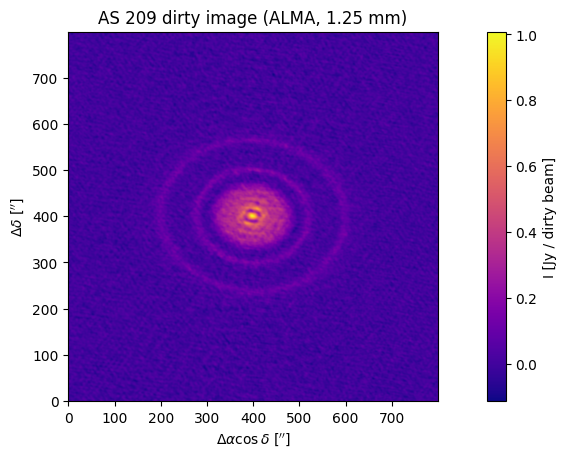

In [191]:
# separting kwargs into those passed to `plt.imshow` and those used to add plot labels
plot_kw = {
    "cmap": "plasma",
    "norm": None,
    "origin": "lower",
    "interpolation": None,
    }

ax_kw = {
    "title": "AS 209 dirty image (ALMA, 1.25 mm)",
    "xlab": r"$\Delta \alpha \cos \delta$ [${}^{\prime\prime}$]",
    "ylab": r"$\Delta \delta$ [${}^{\prime\prime}$]",
    "clab": r"I [Jy / dirty beam]",
    }

im, cbar = plot_image_simple(
    as209_img,
    extent=[1.5, -1.5, -1.5, 1.5],
    ax=None,
    plot_kwargs=plot_kw,
    ax_kwargs=ax_kw,
    )

## Classes

### Some common class syntax

#### `self`, the `__init__` function, and a basic class structure

A class is defined using the `class` keyword and indenting a subsequent the body of statements - attributes (variables) and methods (functions). Class names should have `FirstWordsCapitalized`.

An instance of a class can be initialized in a certain way (e.g., by setting attributes with given values) using the special method `__init__`, which takes any arguments, `args`, passed in when the class is called.

Class methods (functions) are defined using `def` keyword, but the first argument to each is the same variable, `self`, which refers to the object itself when it wants to call its own methods or refer to its own attributes.

In [192]:
class BankAccount:
  """ An abstract base class representing a bank account"""
  # a *class* variable (shared by all instances of the class)
  currency = '$'

  def __init__(self, customer, account_number, balance):
    """
    Initialize the BankAccount class with a customer, account number
    and opening balance (which defaults to 0.)
    """
    # some *instance* variables (unique to each class instance)
    self.customer = customer
    self.account_number = account_number
    self.balance = balance

    # a private (internal) attribute
    self._used_for_lobbying = self.balance - 1

  def deposit(self, amount):
    """ Deposit amount into the bank account."""
    if amount > 0:
      self.balance += amount
    else:
      print(f"Invalid deposit amount: {amount}")

  def withdraw(self, amount):
    """
    Withdraw amount from the bank account, ensuring there are sufficient funds.
    """
    if amount > 0:
      if amount > self.balance:
        print("Insufficient funds")
      else:
        self.balance -= amount
    else:
      print(f"Invalid withdrawal amount: {amount}")

Now let's create an instance of the class and access one of its attributes:

In [193]:
my_account = BankAccount('Dr. Spaceman', 123456789, 1000)
print(f"balance {my_account.balance}")

# let's update `balance`
my_account.deposit(100)
print(f"balance after deposit {my_account.balance}")

# we can also access the 'private' variables, though presumably they're not meant
# to be user-facing
print(f"nothing to see here...{my_account._used_for_lobbying}")

balance 1000
balance after deposit 1100
nothing to see here...999


#### Class inheritance

Classes can inherit from 'parent' classes -- called 'subclassing'. For example,
`BankAccount` could be subclassed by a class for a savings account:


In [194]:
class SavingsAccount(BankAccount):
  """ A class representing a savings account """

  def __init__(self, customer, account_number, interest_rate, balance=0):
    """ Initialize the savings account. """
    self.interest_rate = interest_rate
    super().__init__(customer, account_number, balance)

  def add_interest(self):
    """ Add interest to the account at the rate self.interest_rate """
    self.balance *= (1. + self.interest_rate / 100)

We did a few new things here. The `SavingsAccount` class adds a new attribute, `interest_rate`, and a new
method, `add_interest`, to its base class. It also overrides the `__init__` method to allow `interest_rate` to be set when a `SavingsAccount` is instantiated.

The new `__init__` method calls the base class’ `__init__` method in order to set the other attributes -- the built-in function `super` allows us to refer to the parent base class.

### Exercise: write an image plotting class

Write a class that contains your image plotting function, the below function for setting a colormap normalization, and a function that wraps (or rewrites) the below 'loose' code, which creates a multi-panel figure that plots the image with different colormap normalizations.  

In [195]:
# function to set a colormap normalization.
# move this function internal to your class.

def get_image_cmap_norm(image, stretch="power", gamma=1.0, asinh_a=0.02,
                        symmetric=False):
    """
    Get a colormap normalization to apply to an image.

    image : array
        2D image array.
    stretch : string, allowed ['power', 'asinh'], default = 'power'
        Transformation to apply to the colormap. 'power' is a
        power law stretch; 'asinh' is an arcsinh stretch.
    gamma : float, default = 1.0
        Index of power law normalization (see matplotlib.colors.PowerNorm).
        gamma=1.0 yields a linear colormap.
    asinh_a : float, default = 0.02
        Scale parameter for an asinh stretch.
    symmetric : bool, default=False
        Whether the colormap is symmetric about 0
    """
    if stretch not in ['power', 'asinh']:
        raise ValueError(f"'stretch' {stretch} is not supported.")

    if symmetric is True:
        vmax = max(abs(image.min()), image.max())
        vmin = -vmax

    else:
        vmax, vmin = image.max(), image.min()
        # if stretch == "power":
        #     vmin = 0

    if stretch == "power":
        norm = mco.PowerNorm(gamma, vmin, vmax)

    else:
        norm = simple_norm(
            image, stretch="asinh", asinh_a=asinh_a, vmin=vmin, vmax=vmax
        )

    return norm

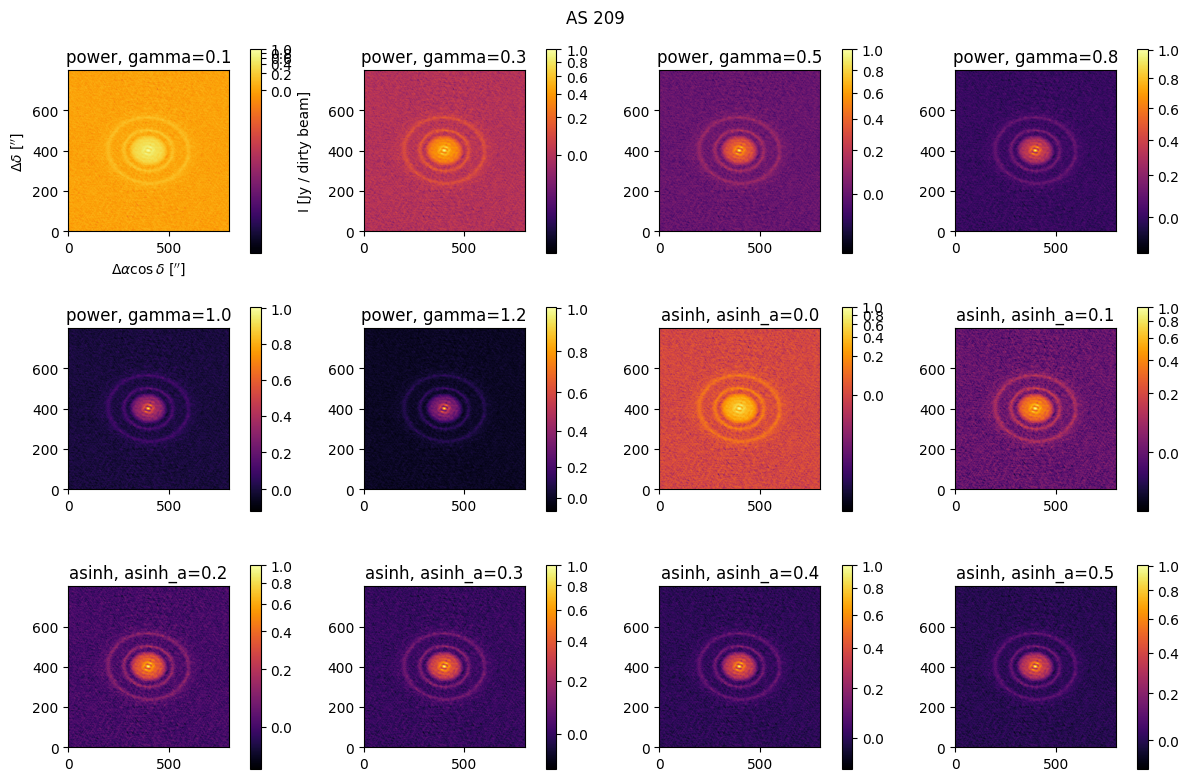

In [196]:
# loose code to make a multi-panel figure.
# turn this into a function internal to the class.

npanels = 12
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
axs = axs.flatten()
fig.suptitle('AS 209')

gammas = np.linspace(0.1, 1.2, int(npanels / 2))
asinh_as = np.linspace(0.01, 0.5, int(npanels / 2))

plot_kw = {
      "cmap":"inferno",
      "norm":None,
      "origin": "lower",
      "interpolation": None,
      }

ax_kw = {
      "title": "AS 209 dirty image (ALMA, 1.25 mm)",
      "xlab": r"$\Delta \alpha \cos \delta$ [${}^{\prime\prime}$]",
      "ylab": r"$\Delta \delta$ [${}^{\prime\prime}$]",
      "clab": r"I [Jy / dirty beam]",
      }

for nn, ax in enumerate(axs):
  p_kw = copy.deepcopy(plot_kw)
  a_kw = copy.deepcopy(ax_kw)

  # updating existing dict entries
  gamma = asinh_a = None

  if nn < npanels // 2:
    stretch = 'power'
    gamma = gammas[nn]
    a_kw['title'] = f"{stretch}, gamma={round(gamma, 1)}"

  else:
    stretch = 'asinh'
    asinh_a = asinh_as[nn - npanels // 2]
    a_kw['title'] = f"{stretch}, asinh_a={round(asinh_a, 1)}"

  norm = get_image_cmap_norm(
      as209_img,
      stretch=stretch,
      gamma=gamma,
      asinh_a=asinh_a,
      )

  # add a new dict entry
  p_kw['norm'] = norm

  if nn != 0:
    a_kw['xlab'] = a_kw['ylab'] = a_kw['clab'] = None

  # this function call is the same as above, even though we added the 'norm' kwarg
  im, cbar = plot_image_simple(
      as209_img,
      extent=[1.5, -1.5, -1.5, 1.5],
      ax=ax,
      plot_kwargs=p_kw,
      ax_kwargs=a_kw,
      )

fig.tight_layout()